In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries

import pandasql as psql

In [2]:
# Load the data 
    
mc_data = pd.read_csv(r"D:\iiit notes\Programming\AI\Internship practice\64 Season 31 - Aug - 2021\Mall_Customers_V1.0.csv", header=0) 
mc_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Display dataset information

mc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Extracting Independent Variables (3-Annual Income (k$) & 4-Spending Score (1-100) )

x = mc_data.iloc[:, [3, 4]].values

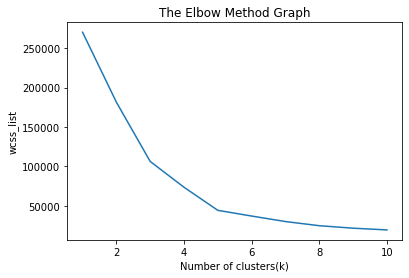

In [5]:
# Finding the optimal number of clusters using the 'elbow method' by uisng 'within-cluster sums of squares (WCSS)'

from sklearn.cluster import KMeans

wcss_list= [] #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 10.

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [6]:
# Training the K-means algorithm on the training dataset

kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x)

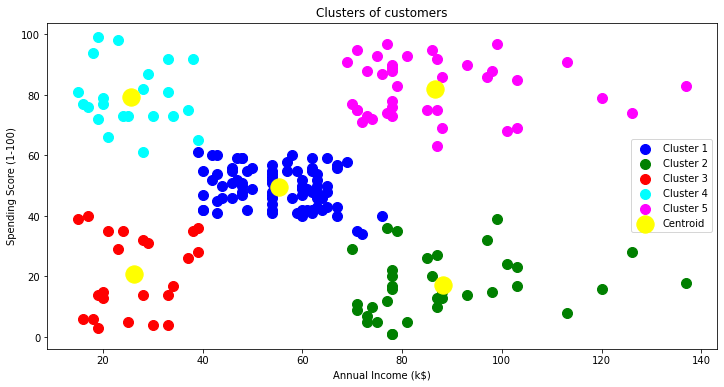

In [7]:
# Visulaizing the clusters

plt.figure(figsize=(12,6))
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [8]:
# Assign the label

mc_data['Cluster_Id'] = kmeans.labels_
mc_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


In [10]:
# What is outcome from above clusters

# Cluster 1 - Annual Income between $40 to $78 and their spending Score is between 40 and 60
# Cluster 2 - Annual Income between $65 to $140 and their spending Score is between 0 and 40
# Cluster 3 - Annual Income between $0 to $40 and their spending Score is between 0 and 40
# Cluster 4 - Annual Income between $0 to $40 and their spending Score is between 60 and 100
# Cluster 5 - Annual Income between $65 to $140 and their spending Score is between 60 and 100